<a href="https://colab.research.google.com/github/ginacu/capstone-project-CSD-096/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aplikasi Rekomendasi Skincare Berdasarkan Permasalahan Wajah

In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import seaborn as sns
import missingno as mno

In [2]:
# Import the Dataset 

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [11]:
!ls "/content/drive/MyDrive/Dataset/Capstone-Dataset-rev2 (2).csv"

'/content/drive/MyDrive/Dataset/Capstone-Dataset-rev2 (2).csv'


Preliminary Exploration

In [12]:
Skincare = pd.read_csv('/content/drive/MyDrive/Dataset/Capstone-Dataset-rev2 (2).csv', low_memory=False)
Skincare.info()
Skincare.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   produk-href      1034 non-null   object 
 1   product_name     1034 non-null   object 
 2   price            1034 non-null   object 
 3   description      1034 non-null   object 
 4   notable_effects  1034 non-null   object 
 5   skintype         1031 non-null   object 
 6   picture_src      1034 non-null   object 
 7   tipe_produk      1034 non-null   object 
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      0 non-null      float64
 12  Unnamed: 12      0 non-null      float64
 13  Unnamed: 13      0 non-null      float64
 14  Unnamed: 14      0 non-null      float64
 15  Unnamed: 15      0 non-null      float64
 16  Unnamed: 16      0 non-null      float64
 17  Unnamed: 17   

,produk-href,product_name,price,description,notable_effects,skintype,picture_src,tipe_produk,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,https://www.beautyhaul.com/product/detail/acne...,Acne Gentle Cleansing Foam,Rp 35.000,Pembersih wajah bebas minyak untuk kulit BERJE...,"Acne-Free, Oil-Control, Pore-Care",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.beautyhaul.com/product/detail/aloe...,Natur Aloe Mild Cleanser,Rp 79.000,Natur Aloe Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.beautyhaul.com/product/detail/acne...,Acne Care Lab Cleanser Scrub,Rp 104.500,Acne Care Lab Acne Cleanser Scrub Beta Plus (A...,Acne-Free,Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.beautyhaul.com/product/detail/brig...,Brightening Facial Cleanser,Rp 35.000,"Pembersih wajah yang segar, lembut dan creamy ...","Acne-Free, Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.beautyhaul.com/product/detail/pome...,Natur Pome Mild Cleanser,Rp 79.000,Natur Pome Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Remove column Unnamed 8-25 as not important to the model 

Skincare.drop(["Unnamed: 8", "Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25"], axis=1, inplace=True)
Skincare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   produk-href      1034 non-null   object
 1   product_name     1034 non-null   object
 2   price            1034 non-null   object
 3   description      1034 non-null   object
 4   notable_effects  1034 non-null   object
 5   skintype         1031 non-null   object
 6   picture_src      1034 non-null   object
 7   tipe_produk      1034 non-null   object
dtypes: object(8)
memory usage: 64.8+ KB


# Data Exploration 

In [14]:
categorical_features = ['notable_effects', 'skintype', 'tipe_produk']

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

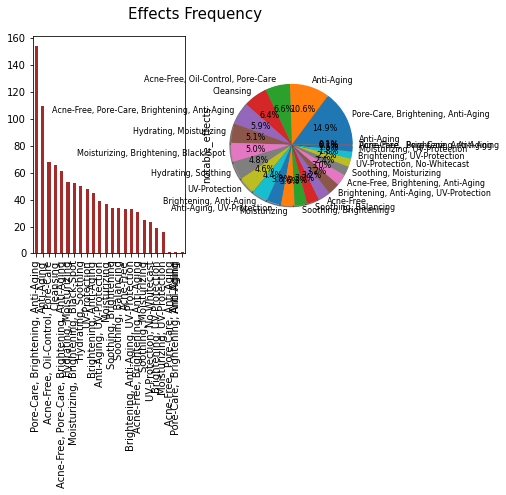

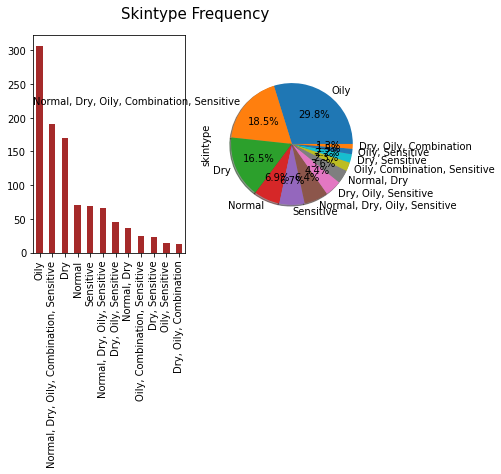

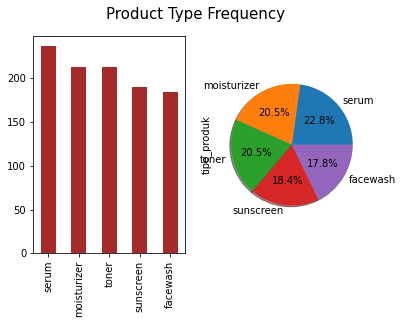

In [15]:
#Plotting Categorical Variables

fig, ax = plt.subplots(1, 2)
Skincare["notable_effects"].value_counts().plot.bar(color="brown", ax=ax[0])
Skincare["notable_effects"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 8},ax=ax[1])
fig.suptitle("Effects Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
Skincare["skintype"].value_counts().plot.bar(color="brown", ax=ax[0])
Skincare["skintype"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Skintype Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
Skincare["tipe_produk"].value_counts().plot.bar(color="brown", ax=ax[0])
Skincare["tipe_produk"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Product Type Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

In [26]:
# Checking data balancing 

auto_balancing = pd.DataFrame()
auto_balancing["Count"] = Skincare["skintype"].value_counts()
auto_balancing["Count%"] = Skincare["skintype"].value_counts()/Skincare.shape[0]*100

auto_balancing

,Count,Count%
Oily,307,29.690522
"Normal, Dry, Oily, Combination, Sensitive",191,18.471954
Dry,170,16.441006
Normal,71,6.866538
Sensitive,69,6.673114
"Normal, Dry, Oily, Sensitive",66,6.382979
"Dry, Oily, Sensitive",45,4.352031
"Normal, Dry",37,3.578337
"Oily, Combination, Sensitive",24,2.321083
"Dry, Sensitive",23,2.224371


In [18]:
# Checking data balancing (for classification)

auto_balancing = pd.DataFrame()
auto_balancing["Count"] = Skincare["tipe_produk"].value_counts()
auto_balancing["Count%"] = Skincare["tipe_produk"].value_counts()/Skincare.shape[0]*100

auto_balancing

,Count,Count%
serum,236,22.823985
moisturizer,212,20.502901
toner,212,20.502901
sunscreen,190,18.375242
facewash,184,17.794971


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



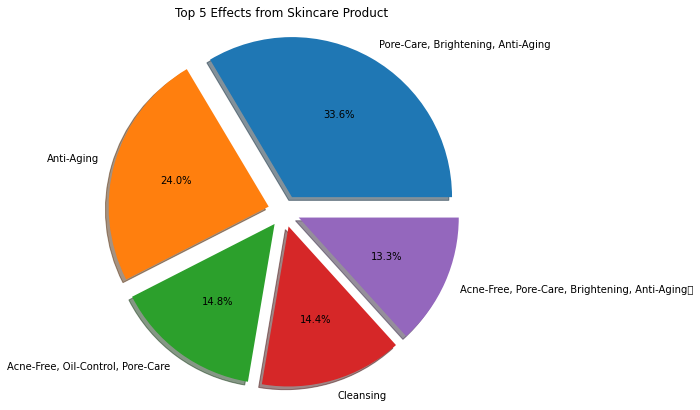

In [29]:
# Plotting top notable_effects from skincare product 

top_effects=(Skincare['notable_effects'].value_counts()).to_dict()
count= pd.DataFrame(list(top_effects.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(5)
labels = 'Pore-Care, Brightening, Anti-Aging','Anti-Aging','Acne-Free, Oil-Control, Pore-Care','Cleansing','Acne-Free, Pore-Care, Brightening, Anti-Aging'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1)
fig1 , ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 5 Effects from Skincare Product")
ax1.axis ('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



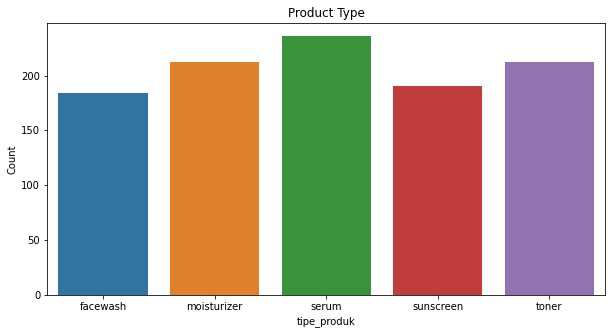

In [22]:
plt.subplots(figsize=(10,5))
sns.countplot(Skincare['tipe_produk'].sort_values())
plt.xlabel('tipe_produk')
plt.ylabel('Count')
plt.title('Product Type')

plt.show()

In [23]:
# Checking null value 

Skincare.isnull().sum()

produk-href        0
product_name       0
price              0
description        0
notable_effects    0
skintype           3
picture_src        0
tipe_produk        0
dtype: int64

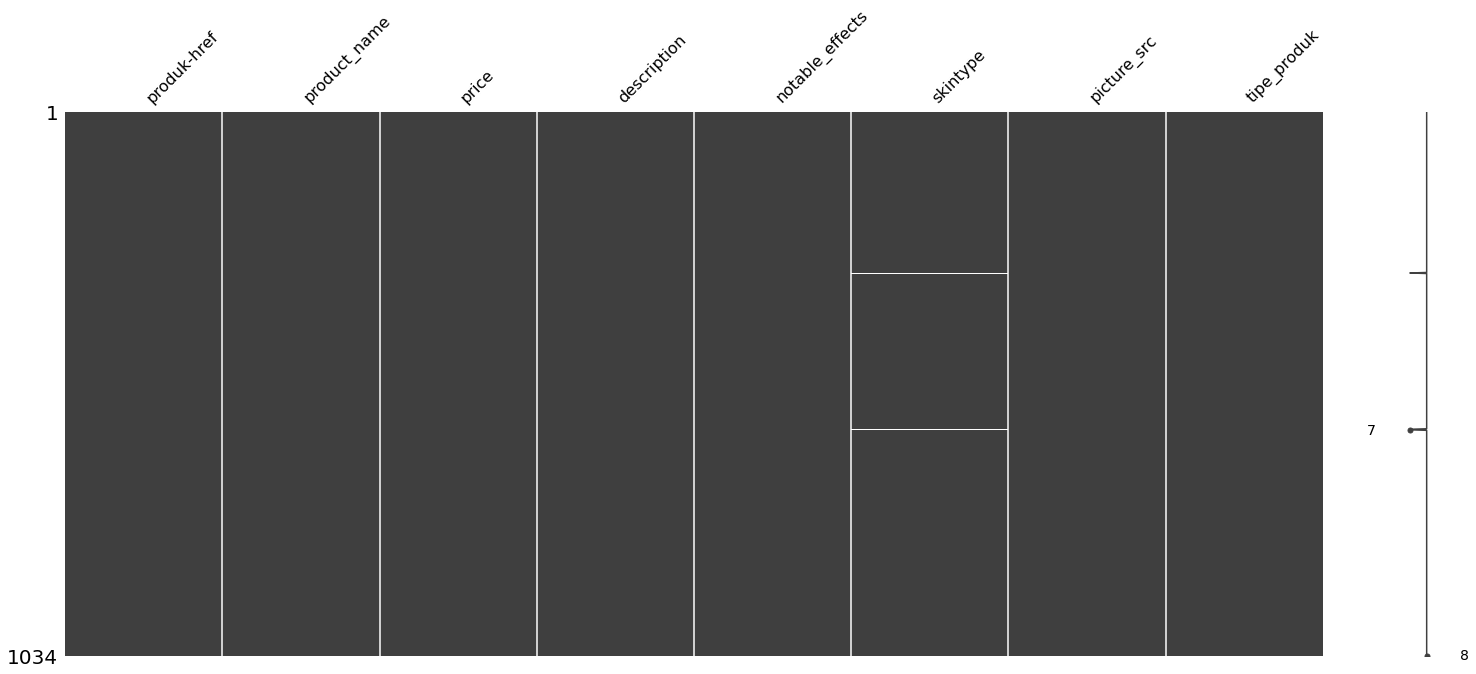

In [24]:
# Visualize the missing values in the dataframe

mno.matrix(Skincare)

In [25]:
# Checking the existence of duplicated rows

Skincare.duplicated().sum()

2

# Data Cleaning

In [36]:
# Remove duplicated rows (2 in total)

Skincare.drop_duplicates(inplace=True)

# Replacing the missing values"

Skincare["skintype"].fillna("Dry, Oily, Combination", inplace=True)

In [38]:
# Re-checking null value 

Skincare.isnull().sum()

# Re-hecking the existence of duplicated rows

Skincare.duplicated().sum()

0

In [39]:
Skincare.head(10)

,produk-href,product_name,price,description,notable_effects,skintype,picture_src,tipe_produk
0,https://www.beautyhaul.com/product/detail/acne...,Acne Gentle Cleansing Foam,Rp 35.000,Pembersih wajah bebas minyak untuk kulit BERJE...,"Acne-Free, Oil-Control, Pore-Care",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash
1,https://www.beautyhaul.com/product/detail/aloe...,Natur Aloe Mild Cleanser,Rp 79.000,Natur Aloe Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash
2,https://www.beautyhaul.com/product/detail/acne...,Acne Care Lab Cleanser Scrub,Rp 104.500,Acne Care Lab Acne Cleanser Scrub Beta Plus (A...,Acne-Free,Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash
3,https://www.beautyhaul.com/product/detail/brig...,Brightening Facial Cleanser,Rp 35.000,"Pembersih wajah yang segar, lembut dan creamy ...","Acne-Free, Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash
4,https://www.beautyhaul.com/product/detail/pome...,Natur Pome Mild Cleanser,Rp 79.000,Natur Pome Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash
5,https://www.beautyhaul.com/product/detail/gent...,FSS Gentle Cleansing Foam Refill,Rp 100.000,FSS Gentle Cleansing Foam tersedia dalam kanto...,Anti-Aging,Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash
6,https://www.beautyhaul.com/product/detail/c-wh...,C White Lightening Tone Up Body Serum,Rp 47.000,Serum ringan untuk tubuh agar tampak lebih cer...,"Pore-Care, Brightening, Anti-Aging",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash
7,https://www.beautyhaul.com/product/detail/cica...,Natur Cica Mild Cleanser,Rp 79.000,Natur Cica Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash
8,https://www.beautyhaul.com/product/detail/foam...,Foamwork PH 50-60 Foaming Cleanser,Rp 109.000,Self-foaming cleanser (pH = 5.0-6.0) 100ml Dib...,Anti-Aging,Oily,https://www.beautyhaul.com/assets/uploads/prod...,facewash
9,https://www.beautyhaul.com/product/detail/gott...,Gotta Smooth Gentle Exfoliating Cleanser,Rp 140.000,Pembersih wajah dengan tekstur gel yang dapat ...,"Acne-Free, Oil-Control, Pore-Care",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash


# Data Preparation

In [ ]:
# Convert categorical variables (notable_effects', 'skintype', 'tipe_produk) to dummies

Skincare = pd.concat([Skincare, pd.get_dummies(Skincare["notable_effects"], prefix="notable_effects")], axis=1)
Skincare = pd.concat([Skincare, pd.get_dummies(Skincare["skintype"], prefix="skintype")], axis=1)
#target variable for the ML model (label encoding)
Skincare["tipe_produk"] = Skincare["tipe_produk"].apply(lambda x: ["facewash", "toner", "serum", "moisturizer", "sunscreen"].index(x))+1 #Label encoding
#target variable for the DL model (one-hot encoding)
Skincare = pd.concat([Skincare, pd.get_dummies(Skincare["tipe_produk"], prefix="tipe_produk")], axis=1)
Product_encoding_dl = np.asarray(Skincare[["facewash", "toner", "serum", "moisturizer", "sunscreen"]])

Skincare.to_excel("dataset_skincare_clean.xlsx")